In [124]:
# exploratory notebook for Salty Hackers

In [134]:
# api data imports 
import pandas as pd
import numpy as np
import json
import sqlite3
import urllib
from time import sleep
import requests

In [135]:
from warnings import filterwarnings
filterwarnings("ignore")

In [136]:
html = urllib.request.urlopen('https://hacker-news.firebaseio.com/v0/item/2169746.json?print=pretty')
json.loads(html.read())

{'by': 'timrobinson',
 'id': 2169746,
 'parent': 2169669,
 'text': "After being down all day yesterday, the site's now working for me.<p>Not much crime in my small part of south-east London, except for an ominous 'other crime' at the end of the street...",
 'time': 1296642293,
 'type': 'comment'}

In [137]:
x = urllib.request.urlopen('https://hacker-news.firebaseio.com/v0/maxitem.json?print=pretty')
last_num = x.read()
print(last_num)

b'23318523\n'


In [138]:
# the last hacker news item id is 23302173 so we could query the last thousand or few thousand. 

In [139]:
# initialize empty json list
data = []

In [175]:
# get data from hacker news
# idk why but this code is now being annoying and sometimes runs and sometimes doesn't. 
# Tried in Colab and it worked seamlessly so don't know if it's my env or something else?
for i in range(23320000, 23330000):
    html = urllib.request.urlopen('https://hacker-news.firebaseio.com/v0/item/' + str(i) + '.json')
    data.append(json.loads(html.read()))
    sleep(.001)
    if i % 100 == 0:
        print(i)

23320000
23320100
23320200
23320300
23320400
23320500
23320600
23320700
23320800
23320900
23321000
23321100
23321200
23321300
23321400
23321500
23321600
23321700
23321800
23321900


URLError: <urlopen error EOF occurred in violation of protocol (_ssl.c:1045)>

In [176]:
print(len(data))

12412


In [177]:
data[100]

{'by': 'prawn',
 'id': 23300100,
 'kids': [23301278],
 'parent': 23295848,
 'text': 'There are places in Australia that might have weather similar to California. USD would go further here also.',
 'time': 1590407183,
 'type': 'comment'}

In [178]:
# filter nulls 
data = [i for i in data if i is not None]

In [145]:
# didn't work 
from pandas.io.json import json_normalize
# df = pd.json_normalize(json_obj)

In [209]:
# second run of the api to get more data
df1 = pd.DataFrame.from_dict(json_normalize(data))
df1.head()

,by,id,kids,parent,text,time,type,descendants,score,title,url,dead,deleted
0,skoskie,23300000,"[23312320, 23300035]",23299227.0,"The SEO community tried to game the shit out of the blacklist feature.<p>People with 1000 fake accounts were charging to blacklist a specific domain. Because so few actual search users made use of the feature, it didn’t take many accounts to impact search rank. So that feature had a short lifespan.",1590405926,comment,NaN,NaN,NaN,NaN,NaN,NaN
1,m0zg,23300001,"[23302953, 23302329]",23299592.0,"TBH if those were the only available choices, burgers would win. A much easier job.",1590405930,comment,NaN,NaN,NaN,NaN,NaN,NaN
2,nix23,23300002,NaN,23299836.0,How can they disable DoH? That&#x27;s Dns over HTTPS.,1590405936,comment,NaN,NaN,NaN,NaN,NaN,NaN
3,A4ET8a8uTh0,23300003,NaN,NaN,NaN,1590405957,story,0.0,1.0,Mountain goats climb nearly vertical cliffs,http://thescienceexplorer.com/nature/how-mountain-goats-ascend-nearly-vertical-cliffs,NaN,NaN
4,myfonj,23300004,NaN,23299712.0,"Site search provided by author seems like the best option on the first glance, but sadly in my experience those in-house full-text searches are most of the times way inferior than simple `site:` limited google search. If not in relevance then in speed -- I think it is understandable, one could hardly compete with Google in this field.<p>Two genuine anecdotal experiences:\n- MDN search used to be super slow, and to this days its results page is not super nice and still slower than Google:<p>In-site: <a href=""https:&#x2F;&#x2F;developer.mozilla.org&#x2F;en-US&#x2F;search?q=mutationObserver"" rel=""nofollow"">https:&#x2F;&#x2F;developer.mozilla.org&#x2F;en-US&#x2F;search?q=mutationObserve...</a>\nGoogle scoped: <a href=""https:&#x2F;&#x2F;www.google.com&#x2F;search?lr=lang_en&amp;q=mutationObserver%20site:developer.mozilla.org"" rel=""nofollow"">https:&#x2F;&#x2F;www.google.com&#x2F;search?lr=lang_en&amp;q=mutationObserver%...</a><p>- jQuery API docs search felt the same: slow and slightly ...",1590405971,comment,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
#df = pd.DataFrame.from_dict(json_normalize(data))

In [208]:
df = pd.read_csv('hackernews2.csv')
df.head()

,Unnamed: 0,by,id,parent,text,time,type,descendants,score,title,url,kids,dead,deleted
0,0,joshuamorton,23293000,23292948.0,"Right, so you&#x27;re working in a very particular style of application. The style of programming you&#x27;re using doesn&#x27;t work for most software and dodges the source of some memory safety issues.<p>Presuming that this style works equally well for all software seems presumptuous and perhaps naive, does it not?",1590340882,comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,hhs,23293001,NaN,NaN,1590340886,story,0.0,1.0,Quora makes data available to Socialgist,https://www.prweek.com/article/1683868/quora-makes-data-available-socialgist,NaN,NaN,NaN
2,2,hayri,23293002,23290536.0,"a simple search engine in 200 lines - <a href=""https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;7d63349e4e247fbcf7ff9dd01c300b42#file-search-py"" rel=""nofollow"">https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;7d63349e4e247fbcf7ff9dd01c...</a><p>a simple blockchain in 100 lines - <a href=""https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;4ea8e87792dec4e23ecedfd4353107b7#file-blockchain-py"" rel=""nofollow"">https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;4ea8e87792dec4e23ecedfd435...</a>",1590340906,comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,chris_wot,23293003,23292928.0,"No, that sounds like leadership. Being a brilliant jerk, to my mind, is making thoughtless changes constantly and rapidly.<p>There are times when you have no choice but to be disruptive. The trick, as I see it, is to only be as disruptive that you need Be and no more. And when you are disruptive, be prepared for breakage that needs to be repaired, and be ready to communicate - extensively.<p>Also: you had better not be wrong in your disruption.",1590340916,comment,NaN,NaN,NaN,NaN,[23295275],NaN,NaN
4,4,orf,23293004,23292934.0,"&gt; SELECT most_common_vals<p>&gt; FROM pg_stats<p>&gt; WHERE tablename = &#x27;json_test&#x27;<p>&gt; AND attname = &#x27;json_column&#x27;;<p>&gt; {&quot;{\&quot;name\&quot;: \&quot;john\&quot;}&quot;}<p>Hmm. Looks like it does though. Not that it makes a damn bit of difference because if you haven&#x27;t got a functional index (i.e the stats are next to useless) then you&#x27;re doing a full table scan, and in that case it sounds like you “expect full table scans to always be fast” :)<p>And sure, the statistics don&#x27;t help with the query planner, unless you&#x27;ve got a computed column, but again see &quot;I expect full table scans to always be fast&quot; and re-consider the statement &quot;postgres doesn&#x27;t keep statistics on json columns&quot; given the fact that it actually does, just like any other column.<p>Read up indeed!",1590340922,comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
frames = df, df1 
df_full = pd.concat(frames)
print(df_full.shape)
df_full.head()

(22895, 14)


,Unnamed: 0,by,id,parent,text,time,type,descendants,score,title,url,kids,dead,deleted
0,0.0,joshuamorton,23293000,23292948.0,"Right, so you&#x27;re working in a very particular style of application. The style of programming you&#x27;re using doesn&#x27;t work for most software and dodges the source of some memory safety issues.<p>Presuming that this style works equally well for all software seems presumptuous and perhaps naive, does it not?",1590340882,comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,hhs,23293001,NaN,NaN,1590340886,story,0.0,1.0,Quora makes data available to Socialgist,https://www.prweek.com/article/1683868/quora-makes-data-available-socialgist,NaN,NaN,NaN
2,2.0,hayri,23293002,23290536.0,"a simple search engine in 200 lines - <a href=""https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;7d63349e4e247fbcf7ff9dd01c300b42#file-search-py"" rel=""nofollow"">https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;7d63349e4e247fbcf7ff9dd01c...</a><p>a simple blockchain in 100 lines - <a href=""https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;4ea8e87792dec4e23ecedfd4353107b7#file-blockchain-py"" rel=""nofollow"">https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;4ea8e87792dec4e23ecedfd435...</a>",1590340906,comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,chris_wot,23293003,23292928.0,"No, that sounds like leadership. Being a brilliant jerk, to my mind, is making thoughtless changes constantly and rapidly.<p>There are times when you have no choice but to be disruptive. The trick, as I see it, is to only be as disruptive that you need Be and no more. And when you are disruptive, be prepared for breakage that needs to be repaired, and be ready to communicate - extensively.<p>Also: you had better not be wrong in your disruption.",1590340916,comment,NaN,NaN,NaN,NaN,[23295275],NaN,NaN
4,4.0,orf,23293004,23292934.0,"&gt; SELECT most_common_vals<p>&gt; FROM pg_stats<p>&gt; WHERE tablename = &#x27;json_test&#x27;<p>&gt; AND attname = &#x27;json_column&#x27;;<p>&gt; {&quot;{\&quot;name\&quot;: \&quot;john\&quot;}&quot;}<p>Hmm. Looks like it does though. Not that it makes a damn bit of difference because if you haven&#x27;t got a functional index (i.e the stats are next to useless) then you&#x27;re doing a full table scan, and in that case it sounds like you “expect full table scans to always be fast” :)<p>And sure, the statistics don&#x27;t help with the query planner, unless you&#x27;ve got a computed column, but again see &quot;I expect full table scans to always be fast&quot; and re-consider the statement &quot;postgres doesn&#x27;t keep statistics on json columns&quot; given the fact that it actually does, just like any other column.<p>Read up indeed!",1590340922,comment,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
print(df1.shape)
df1.head()

(10476, 13)


,by,id,kids,parent,text,time,type,descendants,score,title,url,dead,deleted
0,skoskie,23300000,"[23312320, 23300035]",23299227.0,"The SEO community tried to game the shit out of the blacklist feature.<p>People with 1000 fake accounts were charging to blacklist a specific domain. Because so few actual search users made use of the feature, it didn’t take many accounts to impact search rank. So that feature had a short lifespan.",1590405926,comment,NaN,NaN,NaN,NaN,NaN,NaN
1,m0zg,23300001,"[23302953, 23302329]",23299592.0,"TBH if those were the only available choices, burgers would win. A much easier job.",1590405930,comment,NaN,NaN,NaN,NaN,NaN,NaN
2,nix23,23300002,NaN,23299836.0,How can they disable DoH? That&#x27;s Dns over HTTPS.,1590405936,comment,NaN,NaN,NaN,NaN,NaN,NaN
3,A4ET8a8uTh0,23300003,NaN,NaN,NaN,1590405957,story,0.0,1.0,Mountain goats climb nearly vertical cliffs,http://thescienceexplorer.com/nature/how-mountain-goats-ascend-nearly-vertical-cliffs,NaN,NaN
4,myfonj,23300004,NaN,23299712.0,"Site search provided by author seems like the best option on the first glance, but sadly in my experience those in-house full-text searches are most of the times way inferior than simple `site:` limited google search. If not in relevance then in speed -- I think it is understandable, one could hardly compete with Google in this field.<p>Two genuine anecdotal experiences:\n- MDN search used to be super slow, and to this days its results page is not super nice and still slower than Google:<p>In-site: <a href=""https:&#x2F;&#x2F;developer.mozilla.org&#x2F;en-US&#x2F;search?q=mutationObserver"" rel=""nofollow"">https:&#x2F;&#x2F;developer.mozilla.org&#x2F;en-US&#x2F;search?q=mutationObserve...</a>\nGoogle scoped: <a href=""https:&#x2F;&#x2F;www.google.com&#x2F;search?lr=lang_en&amp;q=mutationObserver%20site:developer.mozilla.org"" rel=""nofollow"">https:&#x2F;&#x2F;www.google.com&#x2F;search?lr=lang_en&amp;q=mutationObserver%...</a><p>- jQuery API docs search felt the same: slow and slightly ...",1590405971,comment,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
df_clean = df_full.drop(columns = ['Unnamed: 0', 'deleted', 'dead', 'descendants', 'score', 'kids', 'parent', 'title', 'url'])
df_clean.tail()

,by,id,text,time,type
10471,laughinghan,23317843,"That&#x27;s not a counterargument. Nuance doesn&#x27;t contradict the black-and-whiteness of the situation. Sometimes nuance just means there are many shades of black.<p><i>The same thing can also harm the same people, or a different set of people, or the company, in a way that&#x27;s impossible to disentangle from the good.</i><p>It might be impossible to 100% disentangle. But it is nonsense to suggest it could ever be impossible to &gt;0% disentangle. And they have a moral obligation to prioritize disentangling them, to maximize the good and minimize the harm, and to structurally incentivize themselves to succeed at that.<p>But your attitude creates the <i>exact opposite incentive</i>: the more entangled the good with the harm, the more defensible it is for them to passively enrich themselves thru their inaction.<p>Don&#x27;t fall for it. Demand more.<p>Demand structural changes that incentivize real fixes, for example, pledging that ad revenue from hate content and fake news be ...",1590537127,comment
10472,xeeeeeeeeeeenu,23317844,"This what a 2012 New York Times article[1] said about mail-in ballots:<p>&gt;Yet votes cast by mail are less likely to be counted, more likely to be compromised and more likely to be contested than those cast in a voting booth, statistics show. Election officials reject almost 2 percent of ballots cast by mail, double the rate for in-person voting.<p>I&#x27;m sorry, but that so-called &quot;fact checking&quot; looks like a classic case of &quot;Trump said something is bad, so we must defend that thing at all costs&quot;.<p>[1] - <a href=""https:&#x2F;&#x2F;www.nytimes.com&#x2F;2012&#x2F;10&#x2F;07&#x2F;us&#x2F;politics&#x2F;as-more-vote-by-mail-faulty-ballots-could-impact-elections.html"" rel=""nofollow"">https:&#x2F;&#x2F;www.nytimes.com&#x2F;2012&#x2F;10&#x2F;07&#x2F;us&#x2F;politics&#x2F;as-more-vote-...</a>",1590537150,comment
10473,nxtrafalgar,23317845,"There&#x27;s no simple commercial solution that does exactly this that I know of, but you can get very close with Google Cloud Functions, a GitHub Pages site, and a Google Sheets spreadsheet as a datastore. Not static, but it is fast, and you get a &#x27;CMS&#x27; for free (the spreadsheet). Plus all of these services can be used completely for free.",1590537162,comment
10474,annadane,23317846,"Yeah, pretty much. It&#x27;s easy for Facebook to claim that it&#x27;s popular and the best thing going when you specifically need a FB account for contacting people",1590537167,comment
10475,RobAtticus,23317847,"Yes but the topic is mail-in voting fraud. He was physically at the polling place and stuffing the box. It&#x27;s fraud and should be punished, but it has nothing to do with mail-in voting fraud.",1590537181,comment


In [72]:
# if further cleaning is needed

# #remove whitespace
# df['Text'] = df['Text'].str.strip().str.lower()

# #\s indicates a white space. So [^\s] is any non-white space and includes letters, numbers, special characters
# df['text'] = df['text'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

# #Replace occurrences of pattern/regex in the Series/Index with some other string
# df['text'] = df['text'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [196]:
pd.set_option("display.max_colwidth", 1000)

In [226]:
df_clean['text'][100]

100                          “— but when a woman shares an experience she disliked she&#x27;s &quot;whining&quot;!”
100    There are places in Australia that might have weather similar to California. USD would go further here also.
Name: text, dtype: object

In [227]:
comments_df = df_clean[df_clean['type'] == 'comment']

In [228]:
comments_df = comments_df.drop_duplicates(subset='text')

In [229]:
comments_df.shape

(14970, 5)

In [230]:
comments_df.head()

,by,id,text,time,type
0,joshuamorton,23293000,"Right, so you&#x27;re working in a very particular style of application. The style of programming you&#x27;re using doesn&#x27;t work for most software and dodges the source of some memory safety issues.<p>Presuming that this style works equally well for all software seems presumptuous and perhaps naive, does it not?",1590340882,comment
2,hayri,23293002,"a simple search engine in 200 lines - <a href=""https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;7d63349e4e247fbcf7ff9dd01c300b42#file-search-py"" rel=""nofollow"">https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;7d63349e4e247fbcf7ff9dd01c...</a><p>a simple blockchain in 100 lines - <a href=""https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;4ea8e87792dec4e23ecedfd4353107b7#file-blockchain-py"" rel=""nofollow"">https:&#x2F;&#x2F;gist.github.com&#x2F;selimslab&#x2F;4ea8e87792dec4e23ecedfd435...</a>",1590340906,comment
3,chris_wot,23293003,"No, that sounds like leadership. Being a brilliant jerk, to my mind, is making thoughtless changes constantly and rapidly.<p>There are times when you have no choice but to be disruptive. The trick, as I see it, is to only be as disruptive that you need Be and no more. And when you are disruptive, be prepared for breakage that needs to be repaired, and be ready to communicate - extensively.<p>Also: you had better not be wrong in your disruption.",1590340916,comment
4,orf,23293004,"&gt; SELECT most_common_vals<p>&gt; FROM pg_stats<p>&gt; WHERE tablename = &#x27;json_test&#x27;<p>&gt; AND attname = &#x27;json_column&#x27;;<p>&gt; {&quot;{\&quot;name\&quot;: \&quot;john\&quot;}&quot;}<p>Hmm. Looks like it does though. Not that it makes a damn bit of difference because if you haven&#x27;t got a functional index (i.e the stats are next to useless) then you&#x27;re doing a full table scan, and in that case it sounds like you “expect full table scans to always be fast” :)<p>And sure, the statistics don&#x27;t help with the query planner, unless you&#x27;ve got a computed column, but again see &quot;I expect full table scans to always be fast&quot; and re-consider the statement &quot;postgres doesn&#x27;t keep statistics on json columns&quot; given the fact that it actually does, just like any other column.<p>Read up indeed!",1590340922,comment
5,devxpy,23293005,"Why do you say that?<p>I believe concurrent.futures is meant as a way for asyncio to spawn threads or processes -- which lets you essentially call sync code from async and not have it block the event loop.<p>From the docs[1] -<p>The concurrent.futures module provides a high-level interface for asynchronously executing callables.<p>The asynchronous execution can be performed with threads, using ThreadPoolExecutor, or separate processes, using ProcessPoolExecutor. Both implement the same interface, which is defined by the abstract Executor class.<p>[1] <a href=""https:&#x2F;&#x2F;docs.python.org&#x2F;3.8&#x2F;library&#x2F;concurrent.futures.html"" rel=""nofollow"">https:&#x2F;&#x2F;docs.python.org&#x2F;3.8&#x2F;library&#x2F;concurrent.futures.html</a>",1590340928,comment


In [231]:
comments_df['text'] = comments_df['text'].astype(str)

In [232]:
comments_df['text'][:5]

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Right, so you&#x27;re working in a very particular style of application. The style of programming you&#x27;re using doesn&#x27;t work for most software and dodges the source of some memory safety issues.<p>Presuming that this style works equally well for all software seems presumptuous and perhaps naive, does it not?
2                                                                                                                                             

# Text/Comment Analysis 

In [163]:
# text analysis imports
import nltk
import random
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import f1_score, accuracy_score


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/masonnystrom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [164]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [165]:
def sentiment_analyzer_scores(text):
        score = analyzer.polarity_scores(text)
        str(text)
        return score['compound']
        # use for neg, neutral, and psoitive score 
        #print("{:-<40} {}".format(text, str(score)))

In [166]:
def neg_sentiment_analyzer_scores(text):
        score = analyzer.polarity_scores(text)
        str(text)
        return score['neg']

In [233]:
sentiment_analyzer_scores(comments_df['text'][6])

0.9827

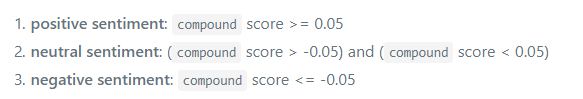

In [234]:
comments_df['vader_score'] = comments_df['text'].apply(sentiment_analyzer_scores)

In [204]:
# if I need to filter by neg vader_scores and negative comments
# test = comments_df[comments_df['vader_score'] < 0]
# test.sort_values(by='neg_score', ascending=False)

In [235]:
comments_df['neg_score'] = comments_df['text'].apply(neg_sentiment_analyzer_scores)

In [206]:
print(comments_df.shape)
comments_df['neg_score'].describe()

(8869, 7)


count    8869.000000
mean        0.053932
std         0.071171
min         0.000000
25%         0.000000
50%         0.032000
75%         0.085000
max         0.804000
Name: neg_score, dtype: float64

## Top 10 negatives/saltiest comments of all time

In [236]:
# top 10 neg comments
comments_df.sort_values(by=['neg_score'], ascending=False)[:30]

,by,id,text,time,type,vader_score,neg_score
12210,biocov19,23213197,Conspiracy Bullshit,1589733989,comment,-0.8020,1.000
9324,random32840,23210308,Heh,1589700454,comment,-0.1531,1.000
10751,eternalban,23211738,Unemployment.,1589721259,comment,-0.4404,1.000
119,fsflover,23300119,Which disaster?,1590407433,comment,-0.6249,0.804
11494,2008guy,23212481,Am I hell banned?,1589727736,comment,-0.8225,0.792
432,HeadsUpHigh,23300432,Sucker Punch,1590411055,comment,-0.5267,0.773
1551,Altheasy,23301551,No thanks,1590417507,comment,-0.3412,0.706
10789,netcan,23211776,My mistake.,1589721594,comment,-0.3400,0.706
12340,zimpenfish,23213327,"No, they aren&#x27;t. Bloody hell, NYT.",1589735042,comment,-0.8176,0.652
2421,christiansakai,23294624,We are flawed.,1590353663,comment,-0.4767,0.608


## Rank Negativity by User comments/sentiment analysis

Still need to:
* get a group list of users
* avg the negativity
* rank users 

Can do all of this sortying with SQL

In [237]:
# look at unique users
comments_df.shape


(14970, 7)

In [238]:
comments_df.to_csv('hackernews4.csv')